# DAT 203 - Lab Assignment #6

- Author: Colin Bowers
- Date: Jun 17, 2023

## Part I

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 

**1 - Upload Titanic dataset**

In [2]:
df = pd.read_csv("data/Titanic_original.csv")
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S


**2 - Define Survived column as TARGET variable**

In [3]:
target = 'Survived'

**3 - Select ALL features that can be predictive of the survival status**

In [4]:
predictors = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [5]:
# To reduce column count, let's use PassengerId as the index
df.set_index("PassengerId", inplace=True)

# Logistic Regression requires numeric variables so we should drop these
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [6]:
# Replace missing values of Age to be the median
median = df["Age"].median()
df.fillna({'Age': median}, inplace=True)

**4 - Transform ALL Possible categorical features with Dummy values**

In [7]:
# for the columns that are categorical, convert them and create dummies for each
dummies = ['Embarked', 'Sex']
for d in dummies:
    df[d] = df[d].astype('category')

dummy_data = pd.get_dummies(df[dummies])
df2 = pd.concat([df, dummy_data], axis=1)
df2.drop(dummies, axis=1, inplace=True)

In [8]:
# Add the new dummy fields to the list of predictors 
predictors.remove("Embarked")
predictors.remove("Sex")
predictors += ["Embarked_C", "Embarked_Q", "Embarked_S", "Sex_female", "Sex_male" ]

**5 - Import Decision Tree function, train and test function from sklearn library**

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

**6 - Apply Decision Tree on the split train/test dataset and report the accuracy**

In [10]:
# split the data into training (80%) and test (20%)
train, test = train_test_split(df2, test_size=0.2)

X_train = train[predictors]
y_train = train[target]

X_test = test[predictors]
y_test = test[target]


In [11]:
model = DecisionTreeClassifier(random_state=0)
model = model.fit(X_train, y_train)

In [12]:
# check accuracy with TRAINING data
y_pred_train = model.predict(X_train)
print(metrics.classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       442
           1       0.99      0.96      0.98       270

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [13]:
# check accuracy with TEST data
y_pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       107
           1       0.75      0.72      0.74        72

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [14]:
mat = metrics.confusion_matrix(y_pred, y_test)
print(mat)

[[90 20]
 [17 52]]


In [15]:
#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(
#    model, 
#    feature_names= predictors,  
#    class_names = target,
#    filled = True
#)

## Part II

In [16]:
#Use the following code to perform hyper-parameter tuning for the decision tree.

from sklearn.model_selection import GridSearchCV
#from sklearn import tree

clf = tree.DecisionTreeClassifier()
parameters = {
    'max_features': ['log2', 'sqrt'], 
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10], 
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 5, 8]
}
grid_obj = GridSearchCV(clf, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [17]:
best_params = grid_obj.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [18]:
model2 = grid_obj.best_estimator_
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
score2 = metrics.accuracy_score(y_test, y_pred2)
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       107
           1       0.79      0.69      0.74        72

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [19]:
print(f"Accuracy improved by: {score2-score:.4f}")

Accuracy improved by: 0.0112


**7 - Change and expand the possible parameters and the number of cv for the hyper-parameter tuning**

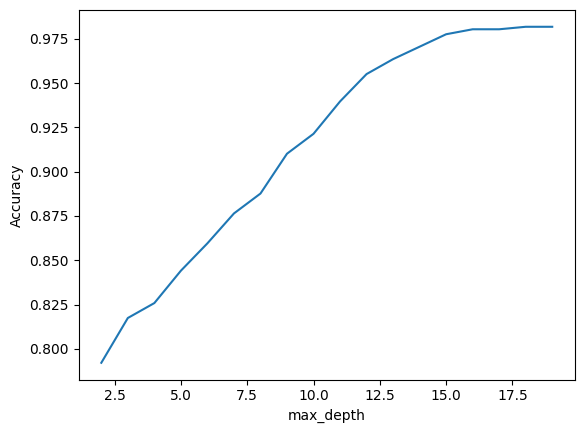

CPU times: user 405 ms, sys: 185 ms, total: 590 ms
Wall time: 294 ms


In [20]:
%%time
################ Explore Max Depth ################

depth_range = range(2, 20)
accuracy = [ ]

for d in depth_range:
    m = tree.DecisionTreeClassifier(max_depth=d, random_state=0)
    m.fit(X_train, y_train)
    score = m.score(X_train, y_train)
    accuracy.append(score)
    
plt.plot(depth_range, accuracy, "-")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()

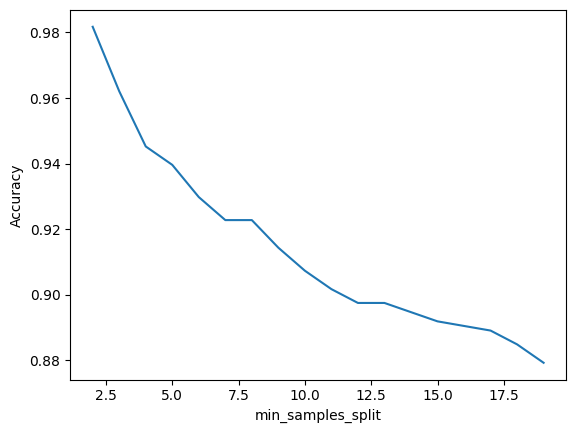

CPU times: user 370 ms, sys: 183 ms, total: 553 ms
Wall time: 261 ms


In [21]:
%%time
################ Explore min_samples_split ################

split_range = range(2, 20)
accuracy = [ ]

for s in split_range:
    m = tree.DecisionTreeClassifier(min_samples_split=s, random_state=0)
    m.fit(X_train, y_train)
    score = m.score(X_train, y_train)
    accuracy.append(score)
    
plt.plot(depth_range, accuracy, "-")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.show()

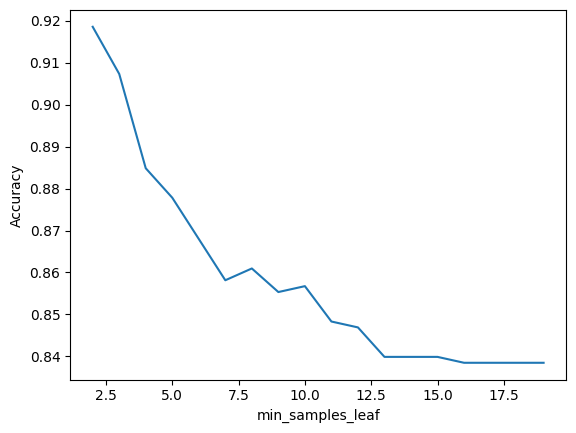

CPU times: user 379 ms, sys: 201 ms, total: 580 ms
Wall time: 275 ms


In [22]:
%%time
################ Explore min_samples_leaf ################

leaf_range = range(2, 20)
accuracy = [ ]

for l in leaf_range:
    m = tree.DecisionTreeClassifier(min_samples_leaf=l, random_state=0)
    m.fit(X_train, y_train)
    score = m.score(X_train, y_train)
    accuracy.append(score)
    
plt.plot(depth_range, accuracy, "-")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.show()

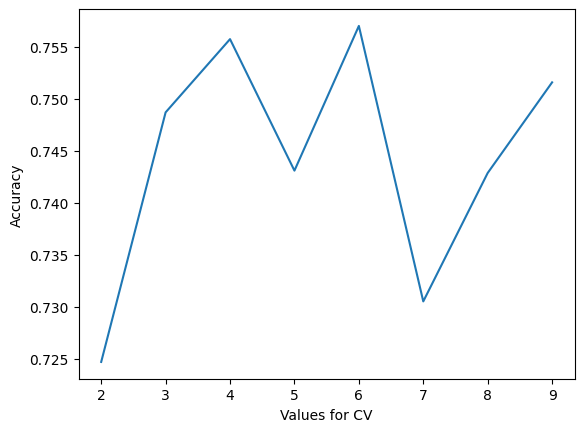

CPU times: user 24.4 s, sys: 0 ns, total: 24.4 s
Wall time: 24.1 s


In [23]:
%%time
################ Explore CV ################

cv_range = range(2, 10)
accuracy_cv = [ ]
params_cv = best_params
m = tree.DecisionTreeClassifier()

for i in cv_range:
    g = GridSearchCV(m, params_cv, cv = i)
    g = grid_obj.fit(X_train, y_train)
    accuracy_cv.append(g.cv_results_['mean_test_score'][0])
    
plt.plot(cv_range, accuracy_cv, "-")
plt.xlabel("Values for CV")
plt.ylabel("Accuracy")
plt.show()

**8 - Report feature importance using “feature_importances_” attribute**

In [24]:
imp = model2.feature_importances_ 

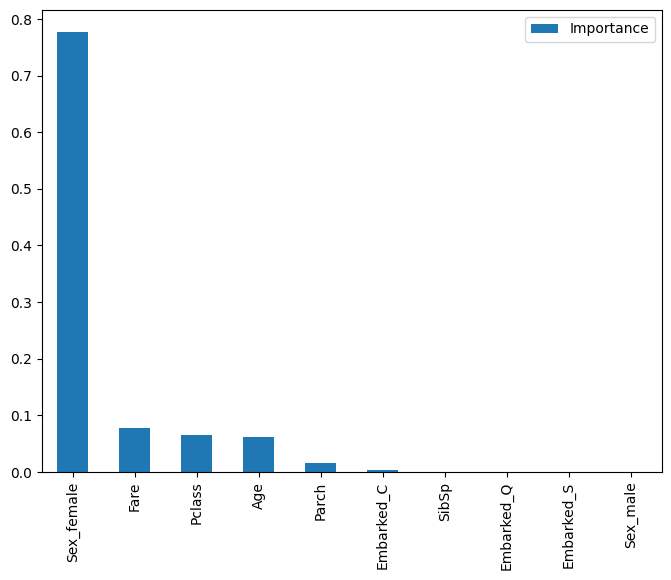

In [25]:
df = pd.DataFrame(imp, index=X_train.columns, columns=["Importance"])
df.sort_values(by='Importance', ascending=False, inplace=True)
df.plot(kind='bar', figsize=(8,6))
plt.show()

**9 - Report the best features according to the decision tree using n_features_ attribute**

In [26]:
model2.n_features_in_

10

In [27]:
print(model2.feature_names_in_)

['Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_C' 'Embarked_Q'
 'Embarked_S' 'Sex_female' 'Sex_male']


In [28]:
df[ df.Importance > 0 ]

,Importance
Sex_female,0.777110
Fare,0.077289
Pclass,0.065559
Age,0.061726
Parch,0.015394
Embarked_C,0.002922


**10 - Compute your model’s confusion matrix, accuracy, and f1-score.**

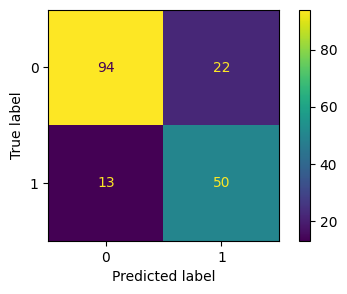

In [29]:
cm = metrics.confusion_matrix(y_pred2, y_test)

fig, ax = plt.subplots(figsize=(5,3))
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = model2.classes_
)
disp.plot(ax=ax)
plt.show()

In [30]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred2)*100:.1f}%")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred2)*100:.1f}%")
print("Confusion Matrix:")
print(cm)

Accuracy: 80.4%
F1 Score: 74.1%
Confusion Matrix:
[[94 22]
 [13 50]]


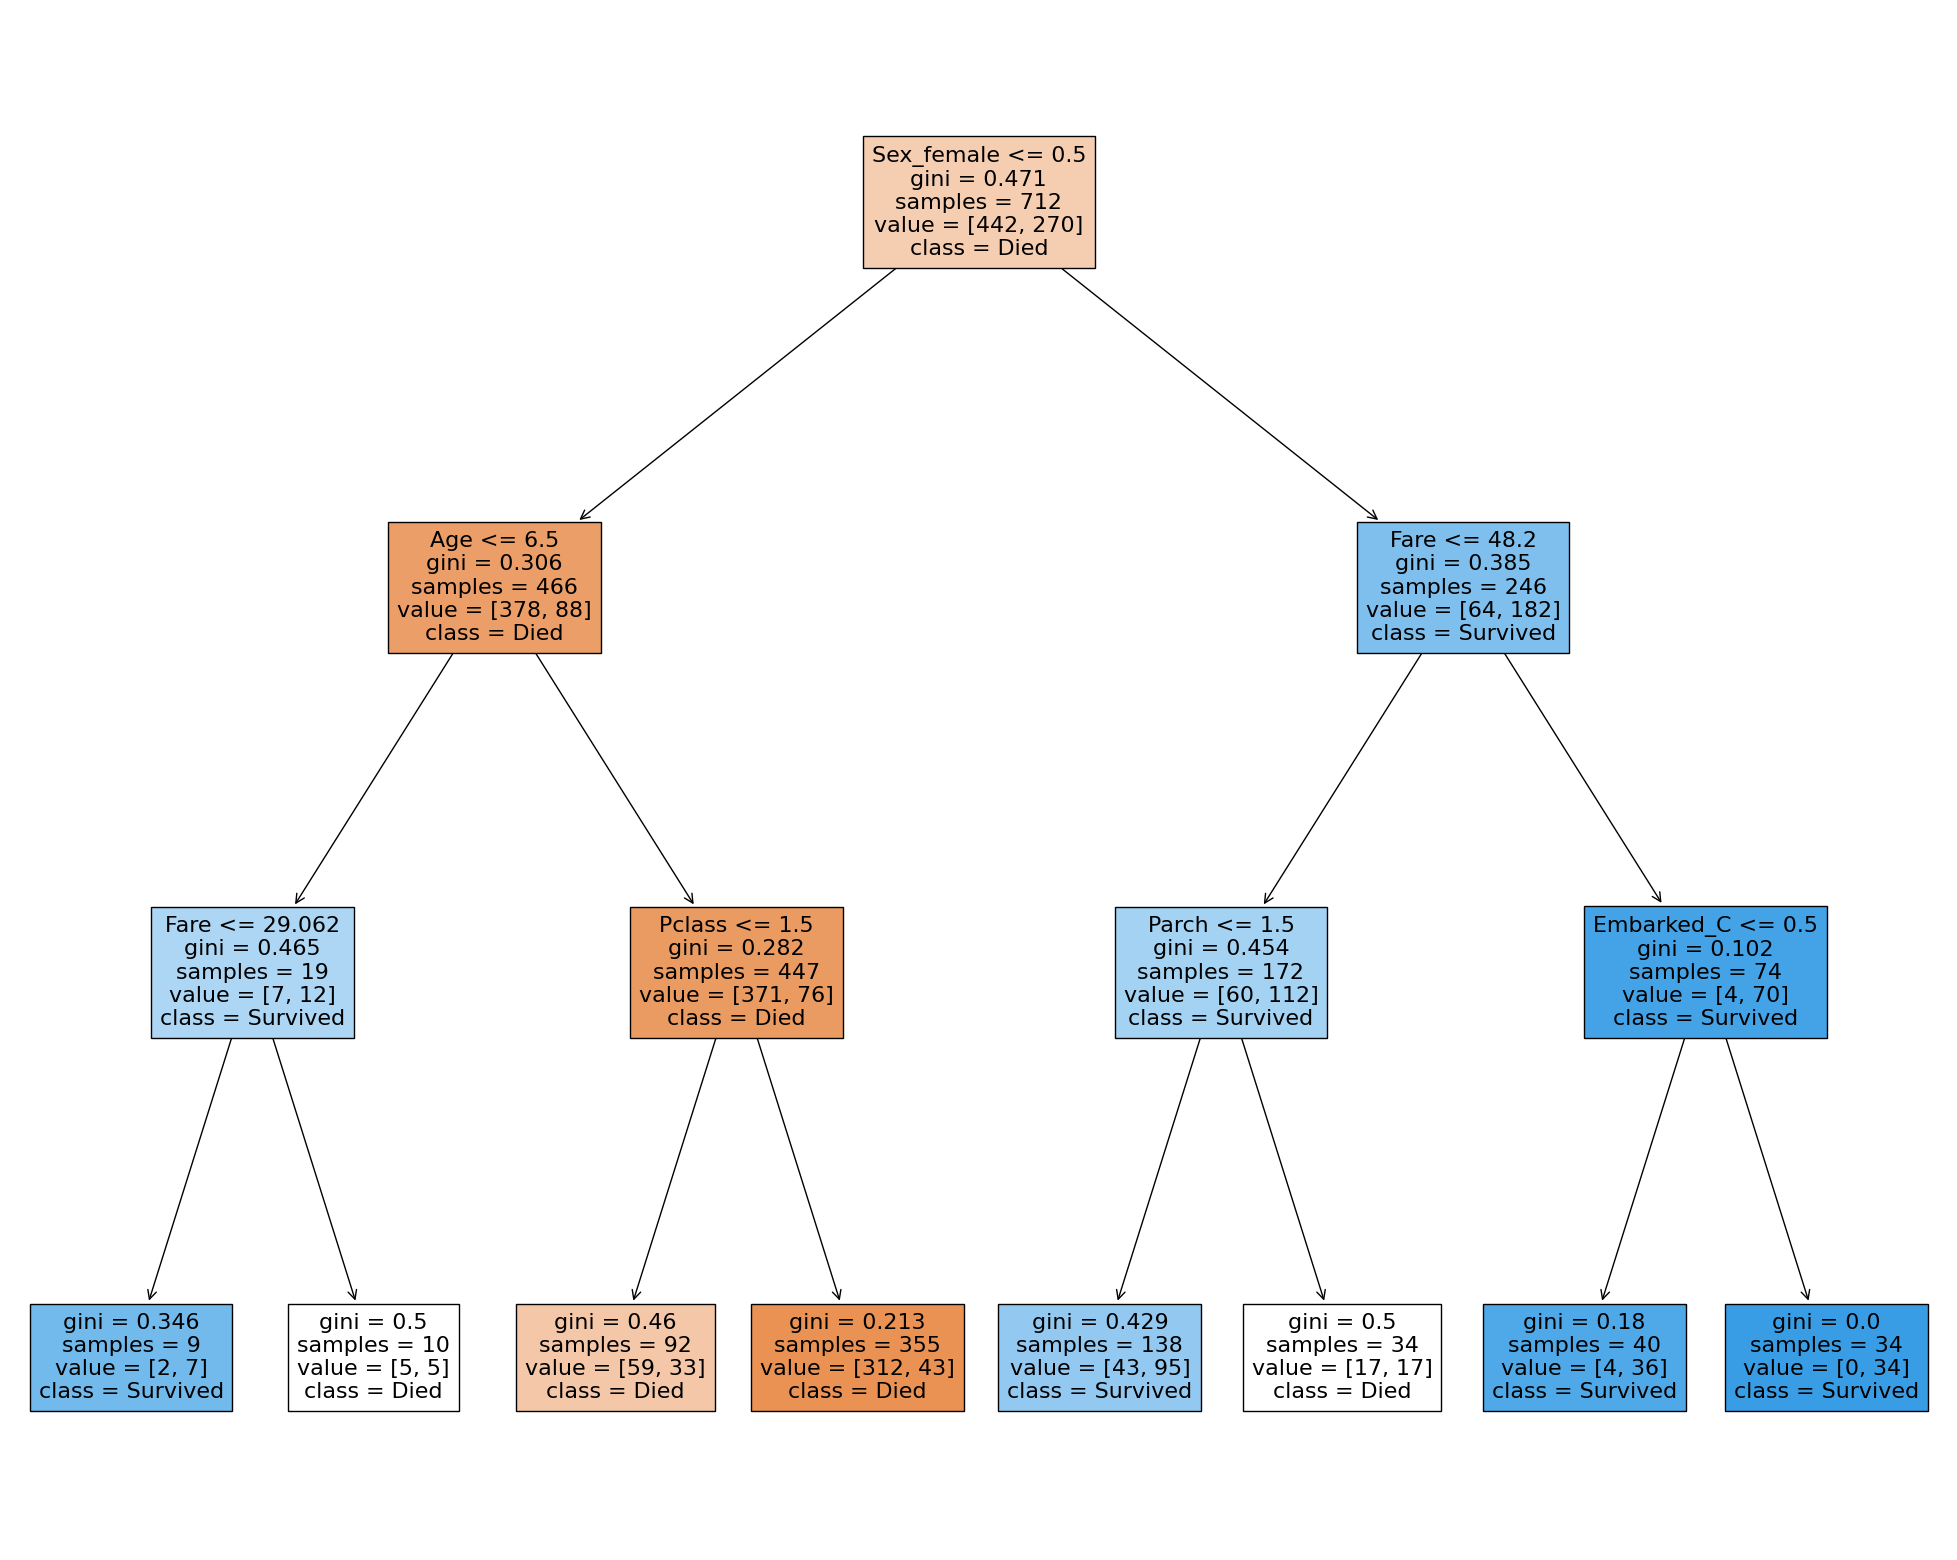

In [33]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    model2, 
    feature_names = predictors,  
    class_names = ["Died", "Survived"],
    filled = True
)